area size: 1.00
area size: 1.00
area size: 1.00
area size: 1.00
area size: 1.00
area size: 1.00


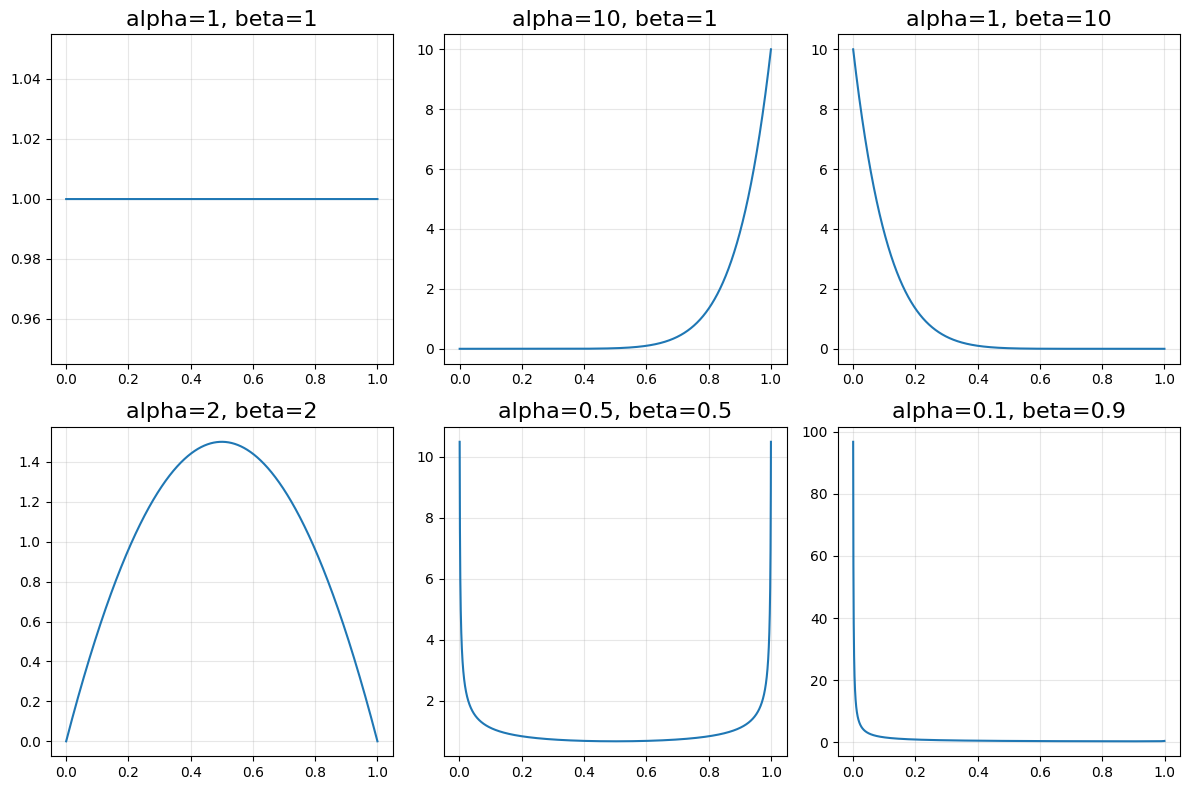

In [19]:
# Beta distribution: alpha and beta examples

import matplotlib.pyplot as plt
import numpy as np


def beta_pdf(x, alpha, beta, dt):
    numerator = x**(alpha-1) * (1-x)**(beta-1)
    # this is the normalisation part
    # the total height of the distribution multiplied by the width of the bin
    # think like a looooong rectangular shape by a short width
    denominator = sum(numerator) * dt
    return numerator / denominator

params = [
    (1, 1),
    (10, 1),
    (1, 10),
    (2, 2),
    (0.5, 0.5),
    (0.1, 0.9),
]

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i, (alpha, beta) in enumerate(params):
    # 10^4 points are enough to get a smooth curve
    # with digital data, it is impossible to replicate a complete continuous curve
    x = np.linspace(0, 1, 10000)
    t = np.linspace(0, 1, 10000)
    dt = t[1] - t[0]

    if alpha < 1 or beta < 1:
        # 0 ** -0.1 = 1 / 0**0.1
        # Dividing by 0 becomes infinity
        # This is a problem when using alpha and beta < 1
        # so we need to start x \in [0,1] with a small epsilon
        eps = 1e-3
        x = np.linspace(eps, 1-eps, 10000)
        t = np.linspace(eps, 1-eps, 10000)
        dt = t[1] - t[0]

    density = beta_pdf(x, alpha, beta, dt)
    # now each density times height and its sum should be 1
    # satisfying one of the properties of probability density function
    print(f"area size: {sum(density) * dt:.2f}")
    axs[i // 3, i % 3].plot(x, density)
    axs[i // 3, i % 3].set_title(
        f'alpha={alpha}, beta={beta}',
        fontsize=16,
    )
    axs[i // 3, i % 3].grid(alpha=0.3)
plt.tight_layout()
plt.show()


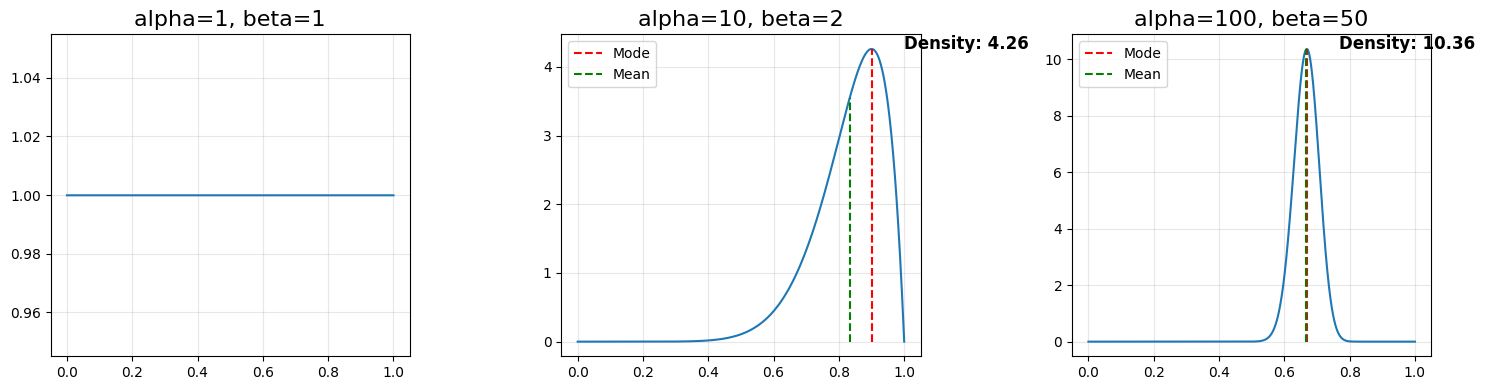

In [20]:
# Beta distribution: alpha and beta examples
x = np.linspace(0, 1, 10000)
t = np.linspace(0, 1, 10000)
dt = t[1] - t[0]

params = [
    (0.5, 1, 1),
    (0.9, 10, 2),
    (0.6689, 100, 50),
]

fig, axs = plt.subplots(1, 3, figsize=(15, 4))

def find_closest_x(x, prob):
    return np.argmin(np.abs(x - prob))

for i, (prob, alpha, beta) in enumerate(params):
    y = beta_pdf(x, alpha, beta, dt)
    axs[i].plot(x, y)
    axs[i].set_title(
        f'alpha={alpha}, beta={beta}',
        fontsize=16,
    )
    axs[i].grid(alpha=0.3)
    x_idx_mode = find_closest_x(x, prob)
    x_idx_mean = find_closest_x(x, alpha/(alpha+beta))
    y_point_mode = y[x_idx_mode]
    y_point_mean = y[x_idx_mean]
    if i != 0:
        axs[i].vlines(
            x=x[x_idx_mode],
            ymin=0,
            ymax=y_point_mode,
            colors='red',
            linestyles='--',
            label=f'Mode'
        )
        axs[i].vlines(
            x=x[x_idx_mean],
            ymin=0,
            ymax=y_point_mean,
            colors='green',
            linestyles='--',
            label=f'Mean'
        )
        axs[i].legend()
        axs[i].annotate(
            f'Density: {y_point_mode:.2f}', xy=(x[x_idx_mode]+0.1, y_point_mode), fontsize=12, fontweight='bold')


plt.tight_layout()
plt.show()


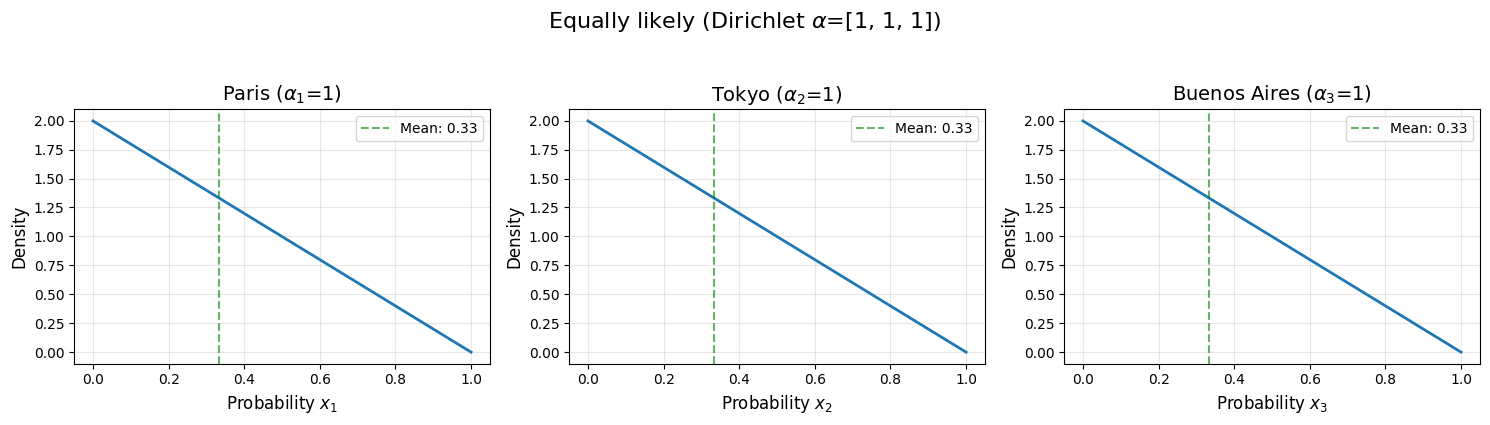

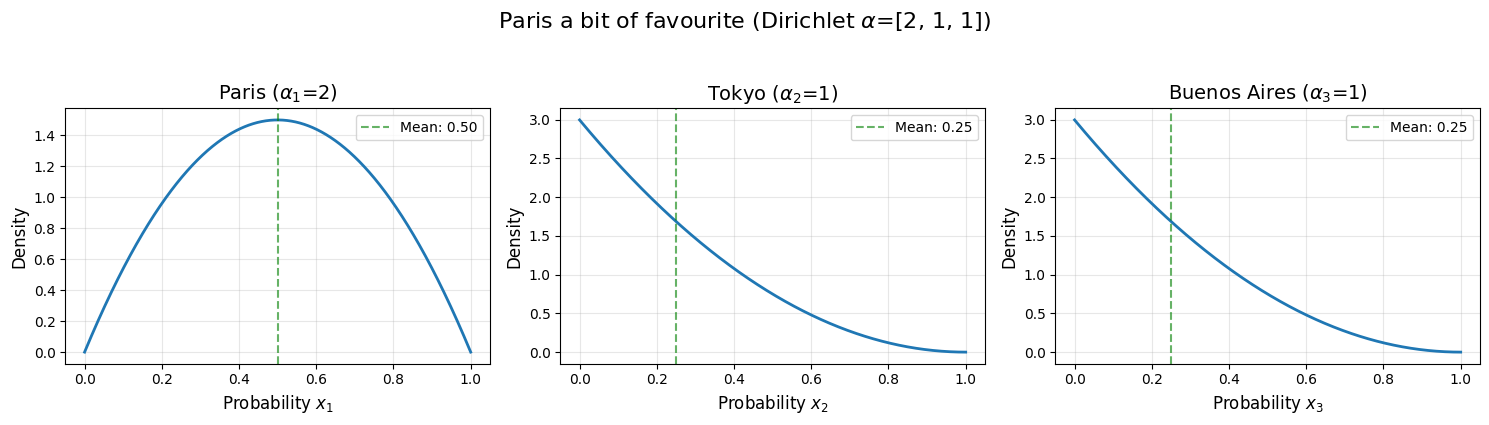

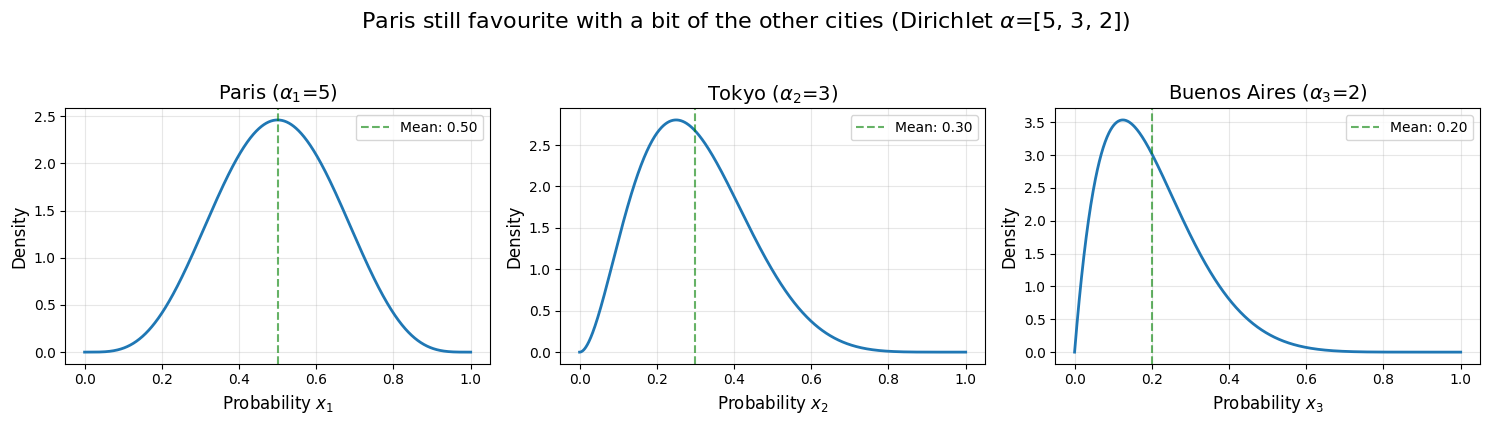

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dirichlet_marginals(alphas, title_prefix):
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    x = np.linspace(0, 1, 1000)
    dt = x[1] - x[0] 
    # Categories
    categories = ['Paris', 'Tokyo', 'Buenos Aires'] 
    
    total_alpha = sum(alphas)
    
    for i in range(3):
        # Marginal of xi is Beta(alpha_i, sum(alpha_j for j != i))
        # i.e., x_i and a_i vs others
        a = alphas[i]
        b = total_alpha - a

        y = beta_pdf(x, a, b, dt)
        
        axs[i].plot(x, y, lw=2)
        axs[i].set_title(f"{categories[i]} ($\\alpha_{i+1}$={a})", fontsize=14)
        axs[i].set_xlabel(f'Probability $x_{i+1}$', fontsize=12)
        axs[i].set_ylabel('Density', fontsize=12)
        axs[i].grid(True, alpha=0.3)
        
        # Mark the mean
        mean = a / total_alpha
        axs[i].axvline(mean, color='green', linestyle='--', alpha=0.6, label=f'Mean: {mean:.2f}')
        axs[i].legend()

    plt.suptitle(f"{title_prefix} (Dirichlet $\\alpha$={alphas})", fontsize=16, y=1.05)
    plt.tight_layout()
    plt.show()

plot_dirichlet_marginals([1, 1, 1], "Equally likely")

plot_dirichlet_marginals([2, 1, 1], "Paris a bit of favourite")

plot_dirichlet_marginals([5, 3, 2], "Paris still favourite with a bit of the other cities")


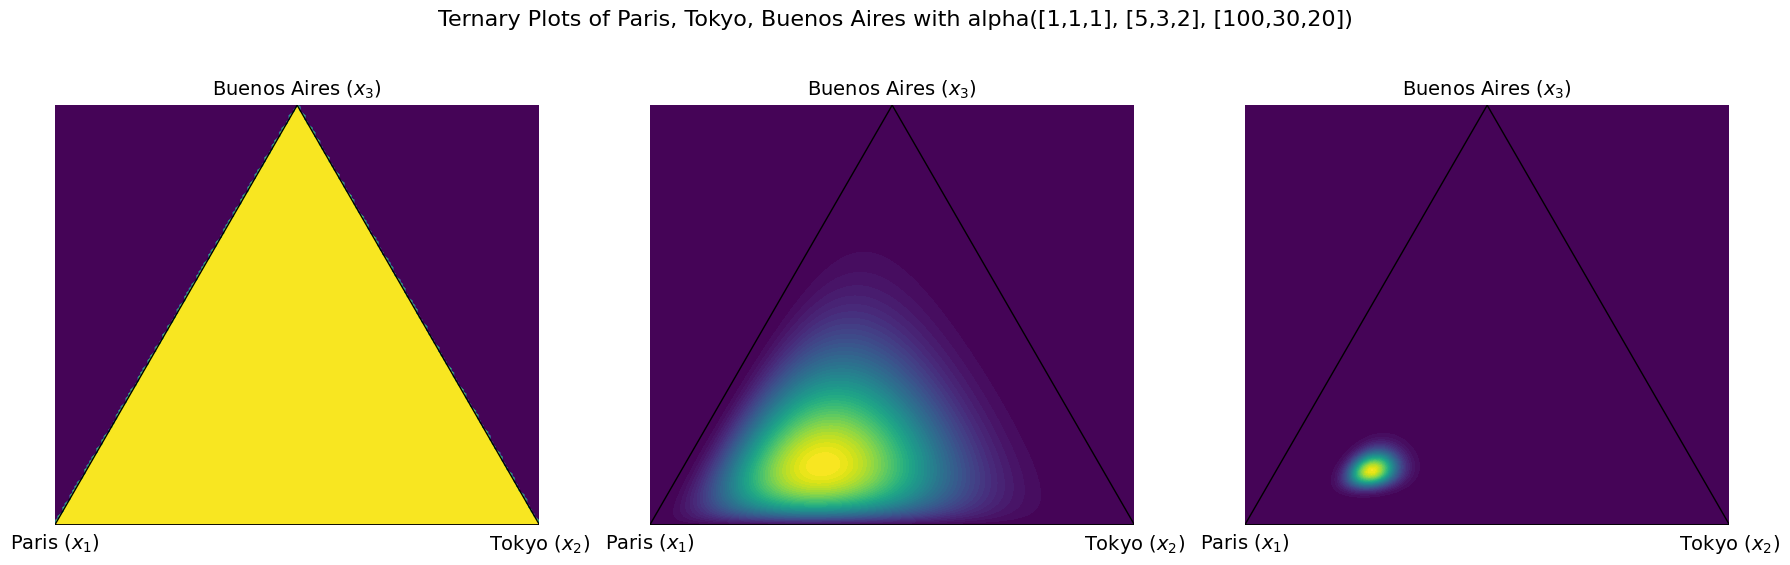

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import dirichlet

def plot_ternary_dirichlet(alphas, ax):
    # Vertices of the equilateral triangle
    v1 = np.array([0, 0])
    v2 = np.array([1, 0])
    v3 = np.array([0.5, np.sqrt(3)/2])
    
    # Create a grid
    res = 200
    x = np.linspace(0, 1, res)
    y = np.linspace(0, np.sqrt(3)/2, res)
    X, Y = np.meshgrid(x, y)
    
    # Map (X, Y) back to barycentric coordinates (x1, x2, x3)
    # y = sqrt(3)/2 * x3  => x3 = y / (sqrt(3)/2)
    # x = x2 + 0.5 * x3  => x2 = x - 0.5 * x3
    # x1 = 1 - x2 - x3
    
    X3 = Y / (np.sqrt(3)/2)
    X2 = X - 0.5 * X3
    X1 = 1 - X2 - X3
    
    # Mask points outside the triangle
    mask = (X1 >= 0) & (X2 >= 0) & (X3 >= 0)
    
    Z = np.zeros_like(X)
    
    # Dirichlet PDF
    # We use a small epsilon for values very close to 0 to avoid NaNs if alpha < 1
    # Though here our alphas are >= 1
    dist = dirichlet(alphas)
    
    coords = np.stack([X1[mask], X2[mask], X3[mask]], axis=-1)
    # To avoid boundaries where x=0, we slightly shrink the coords
    coords = np.clip(coords, 1e-6, 1-1e-6)
    coords /= coords.sum(axis=1, keepdims=True)
    
    Z[mask] = dist.pdf(coords.T)
    
    cf = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
    # Draw triangle borders
    ax.plot([v1[0], v2[0], v3[0], v1[0]], [v1[1], v2[1], v3[1], v1[1]], 'k-', lw=1)
    
    # Labels
    ax.text(v1[0], v1[1]-0.05, 'Paris ($x_1$)', ha='center', fontsize=14)
    ax.text(v2[0], v2[1]-0.05, 'Tokyo ($x_2$)', ha='center', fontsize=14)
    ax.text(v3[0], v3[1]+0.02, 'Buenos Aires ($x_3$)', ha='center', fontsize=14)
    
    #ax.set_title(title, fontsize=12)
    ax.set_aspect('equal')
    ax.axis('off')

# Create the figure with 3 ternary subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

plot_ternary_dirichlet([1.00, 1.00, 1.00], axes[0])
plot_ternary_dirichlet([5, 3, 2], axes[1])
plot_ternary_dirichlet([100, 30, 20], axes[2])

plt.suptitle("Ternary Plots of Paris, Tokyo, Buenos Aires with alpha ([1,1,1], [5,3,2], [100,30,20])", fontsize=16)
plt.tight_layout()